# Optimization

In our question to produce the *perfect* (i.e. **winning**) bracket, we'll need to *optimize*. So I guess we should look into that!

Optimization is the process of finding maxima, minima, and their locations.  It can be constrained, unconstrained, or a combination.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, newton

## One-dimensional optimization
Here's a fun example to play with:

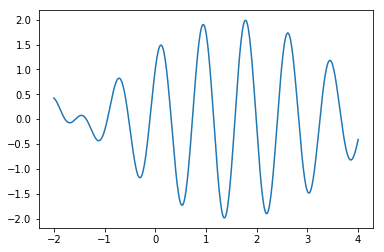

In [2]:
def f(x): return np.sin(8*x)+np.cos(7*x)
x = np.linspace(-2,4,500)
y = f(x)
plt.plot(x,y)

### Newton again
We know how to find roots so, if we can find roots of a derivative, we oughtta be able to optimize. Just be sure to apply Newton's method to the derivative of our function!

(0.94535141275845425, 1.9025571164878743)


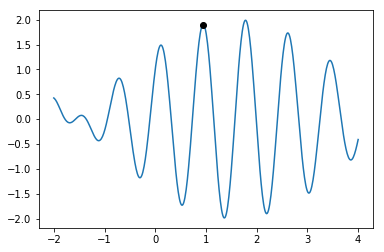

In [3]:
def fp(x): return 8*np.cos(8*x)-7*np.sin(7*x)
def fpp(x): return -64*np.sin(8*x) - 49*np.cos(7*x)
xmin = newton(fp,1,fprime=fpp)
ymin = f(xmin)
print((xmin,ymin))
plt.plot(x,y)
plt.plot(xmin,ymin,'ok')

Well, we sure found a *local* max, but maybe not an absolute. If $f'$ is a pain to find for some reason, we can use a numerical approximation. We'll talk about how that works later!

In [4]:
from scipy.misc import derivative
def fp(x): return derivative(f,x, 10**-5)
newton(fp,1)

0.94535141275296342

The build in command for this is the `minimize` command:

In [5]:
minimize(lambda x: -f(x), 1)

      fun: -1.9025571164878712
 hess_inv: array([[ 0.00929464]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([ 0.94535141])

### The golden section search

There are a couple of nice references for the golden section search [on Wikipedia](https://en.wikipedia.org/wiki/Golden-section_search) and [here](https://www.rose-hulman.edu/~bryan/lottamath/onedopt.pdf). Here's the implementation from Wikipedia:

In [6]:
gr = (np.sqrt(5) + 1) / 2
def gss(f, a, b, tol=10**(-10)):
    c = b - (b - a) / gr
    d = a + (b - a) / gr 
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2

The golden-section search is a bracketing method for *minimization* and requires both endpoints of an interval to proceed.

(0.52869811705141401, -1.7333264176244372)


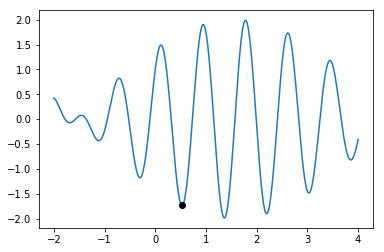

In [7]:
xmin = gss(f, 0, 3)
ymin = f(xmin)
print((xmin,ymin))
plt.plot(x,y)
plt.plot(xmin,ymin,'ok')

## Two D Optimization
Here's a fun function!

In [2]:
def peaks(x,y): return 3*(1-x)**2*np.exp(-(x**2) - \
    (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - \
    1/3*np.exp(-(x+1)**2 - y**2)

Let's take a look at it!

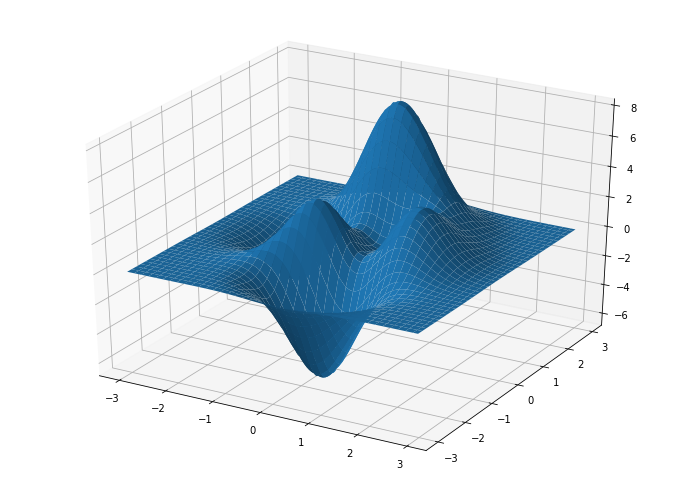

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(-3, 3, 0.05)
Y = np.arange(-3, 3, 0.05)
X, Y = np.meshgrid(X, Y)
Z = peaks(X,Y)

ax.plot_surface(X, Y, Z, lw=0.5)

fig.set_size_inches(12,12)
ax.set_aspect(0.7)

A contour plot might be more helpful, at least if we want a clue as to where the roots are.

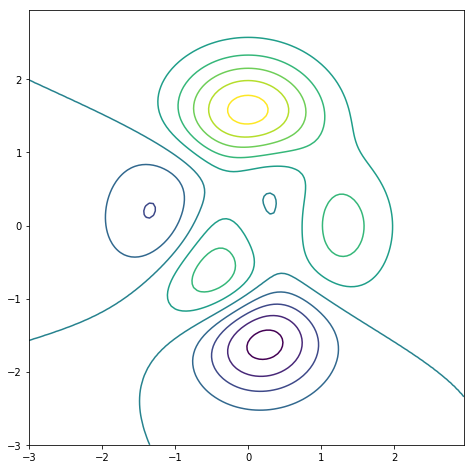

In [4]:
cs = plt.contour(X,Y,Z,10)
ax=plt.gca()
ax.set_aspect(1)
fig=plt.gcf()
fig.set_size_inches(8,8)

The `minimize` command expects a *vector*. Here's how we use it.

In [5]:
def ppeaks(xy): return peaks(xy[0],xy[1])
minimize(ppeaks, [0,-2])

      fun: -6.551133332835837
 hess_inv: array([[ 0.05648954,  0.0070634 ],
       [ 0.0070634 ,  0.03555349]])
      jac: array([  2.98023224e-07,   1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.22827892, -1.62553496])

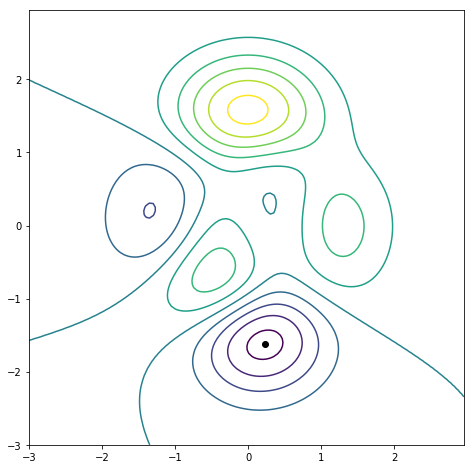

In [6]:
cs = plt.contour(X,Y,Z,10)
ax=plt.gca()
ax.set_aspect(1)
fig=plt.gcf()
fig.set_size_inches(8,8)

plt.plot(0.228, -1.625, 'ok')

In [13]:
from scipy.optimize import approx_fprime
approx_fprime([1.2,2.2], ppeaks,10**-5)

array([-2.30675801, -2.1764034 ])

### Implementation

Implementation of the basic algorithm is not particularly hard. Here's a gradient *ascent* to a maximum.

In [48]:
current = np.array([1,2.2])
trajectory = [current]
grad = approx_fprime(current, ppeaks,10**-5)
norm = np.linalg.norm(grad)
cnt = 0
while norm > 0.01 and cnt <1000:
    step = 0.01*grad/norm
    current = current + step
    trajectory.append(current)
    grad = approx_fprime(current, ppeaks,10**-5)
    norm = np.linalg.norm(grad)
    cnt = cnt + 1

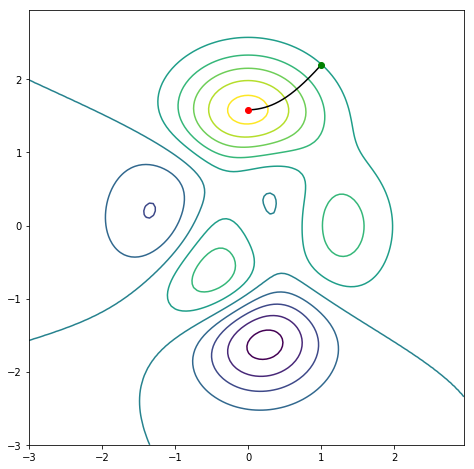

In [49]:
cs = plt.contour(X,Y,Z,10)
xs = [xy[0] for xy in trajectory]
ys = [xy[1] for xy in trajectory]
plt.plot(xs,ys, 'k')
plt.plot(trajectory[0][0], trajectory[0][1],'og')
plt.plot(trajectory[-1][0], trajectory[-1][1],'or')
ax=plt.gca()
ax.set_aspect(1)
fig=plt.gcf()
fig.set_size_inches(8,8)